In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [15]:
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y.shape

(2000,)

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9832166666666667


In [16]:
ytrain_pred

array([[9.99688479e-01, 3.11520635e-04],
       [9.99966000e-01, 3.39995695e-05],
       [2.09976771e-02, 9.79002323e-01],
       ...,
       [8.58463348e-01, 1.41536652e-01],
       [9.99422335e-01, 5.77665099e-04],
       [6.07714035e-01, 3.92285965e-01]])

In [17]:
ytrain_pred[:,1]

array([3.11520635e-04, 3.39995695e-05, 9.79002323e-01, ...,
       1.41536652e-01, 5.77665099e-04, 3.92285965e-01])

### Random Forrest Classifier

In [18]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
#ytrain_pred = rf_model.predict_proba(X_train)
ytrain_pred = rf_model.predict(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred)))
ytest_pred = rf_model.predict(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred)))

RF train roc-auc: 1.0
RF test roc-auc: 0.9566666666666667


### Logistic Regresssion

In [19]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
#print(('Logistic train accuracy: {}'.format(accuracy_score(y_test,ytrain_pred))))
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


### Adaboost Classifier


In [21]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


### KNN Classifies

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
#ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9426111111111111


#### Selecting best threshold for Max Accuracy

In [27]:

pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9850000000000001


In [30]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.97,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.96,0.966929,0.538202,0.8
3,0.96,0.761539,0.509875,0.8
4,0.55,0.779443,0.490344,0.4
...,...,...,...,...
595,0.02,0.024239,0.461121,0.0
596,0.07,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.02,0.001147,0.441720,0.2


In [31]:
final_prediction


0      0.880262
1      0.115823
2      0.816283
3      0.757853
4      0.554947
         ...   
595    0.126340
596    0.127845
597    0.876697
598    0.165717
599    0.834857
Length: 600, dtype: float64

In [32]:
#### Calculate the ROc Curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90422166, 0.90327475, 0.80739711,
       0.80412833, 0.79707612, 0.7955558 , 0.77909273, 0.77821156,
       0.77173524, 0.77037124, 0.73201656, 0.73137362, 0.70999037,
       0.70393711, 0.6667442 , 0.66493537, 0.59156376, 0.58425354,
       0.56896627, 0.56736186, 0.55494674, 0.54139283, 0.53355932,
       0.48366892, 0.46740225, 0.44722765, 0.4346034 , 0.38920009,
       0.38629719, 0.34768074, 0.34336612, 0.23698424, 0.23646893,
       0.23469741, 0.23390421, 0.20995158, 0.20848417, 0.12033548,
       0.1203351 , 0.10498954])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
27,0.447228,0.960000
26,0.467402,0.960000
28,0.434603,0.958333
25,0.483669,0.958333
24,0.533559,0.958333


In [34]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

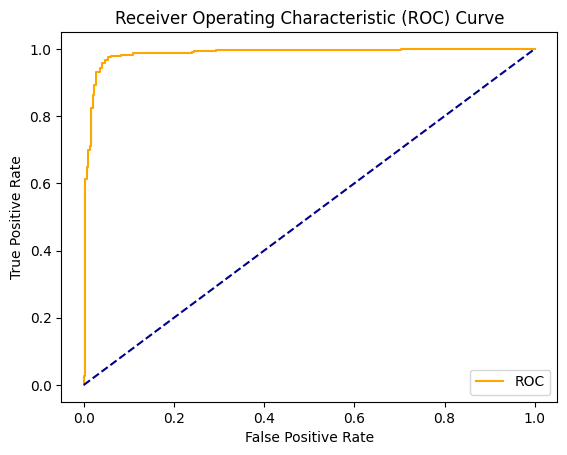

In [35]:
plot_roc_curve(fpr,tpr)


### Lets check if new  ROC has increased the model accuract for Logistic Regression Test Data

#reg = LogisticRegression(class_weight="balanced")
#reg.fit(x_train, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

THRESHOLD = 0.50
preds = np.where(log_classifier.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])


#### Cross check accuracy with with fucntion

In [41]:
y_pred = log_classifier.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred)

0.965

#### As we can see, accuracy is matching for defauly 0.5 threshold

In [44]:
THRESHOLD = 0.447228
preds = np.where(log_classifier.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])


,0
accuracy,0.961667
recall,0.973333
precision,0.951140
roc_auc_score,0.961667


In [1]:
## Hence we came to conclustion. for Default threshold (0.5) only it's best